In this notebook,
- pre-storage lifetime is analysed

In [2]:
# importing functions for analysis
from functions import *

%load_ext autoreload
%autoreload 2

# sometimes needs to be run twice to get good plots
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# loading the data sets

# main detector
data_dict, norm_dict = load_all_main()

# Measuring Pre-Storage Lifetime for Various Configurations

The function used to fit the pre-storage data is:

$$\large{N(t) = N_0 \cdot e^{\frac{-t}{\tau}}}$$

where $\tau$ is the characteristic pre-storage decay time to be extracted.

(1.0730+/-0.0034)e+05
(5.677+/-0.023)e+04
4510+/-14
85mm_norm: dof = 96, redchi = 64.44065745394211
(5.759+/-0.015)e+04
(3.138+/-0.018)e+04
2503+/-5
72mm_jpti: dof = 107, redchi = 4.66811553689559
(7.618+/-0.017)e+04
(4.093+/-0.012)e+04
3178+/-17
72mm_jpsu: dof = 15, redchi = 77.8608081563092
(8.99+/-0.05)e+04
(4.798+/-0.035)e+04
3781+/-27
72mm_norm: dof = 12, redchi = 17.579887710574575
(1.000+/-0.010)e+05
(5.32+/-0.06)e+04
4223+/-9
85mm_ug01: dof = 112, redchi = 1.8122703444982489
(1.003+/-0.011)e+05
(5.32+/-0.07)e+04
4203+/-35
85mm_ug03: dof = 14, redchi = 5.394320188506972
(1.043+/-0.013)e+05
(5.49+/-0.08)e+04
4302+/-19
85mm_ug19: dof = 45, redchi = 1.8845211808483586


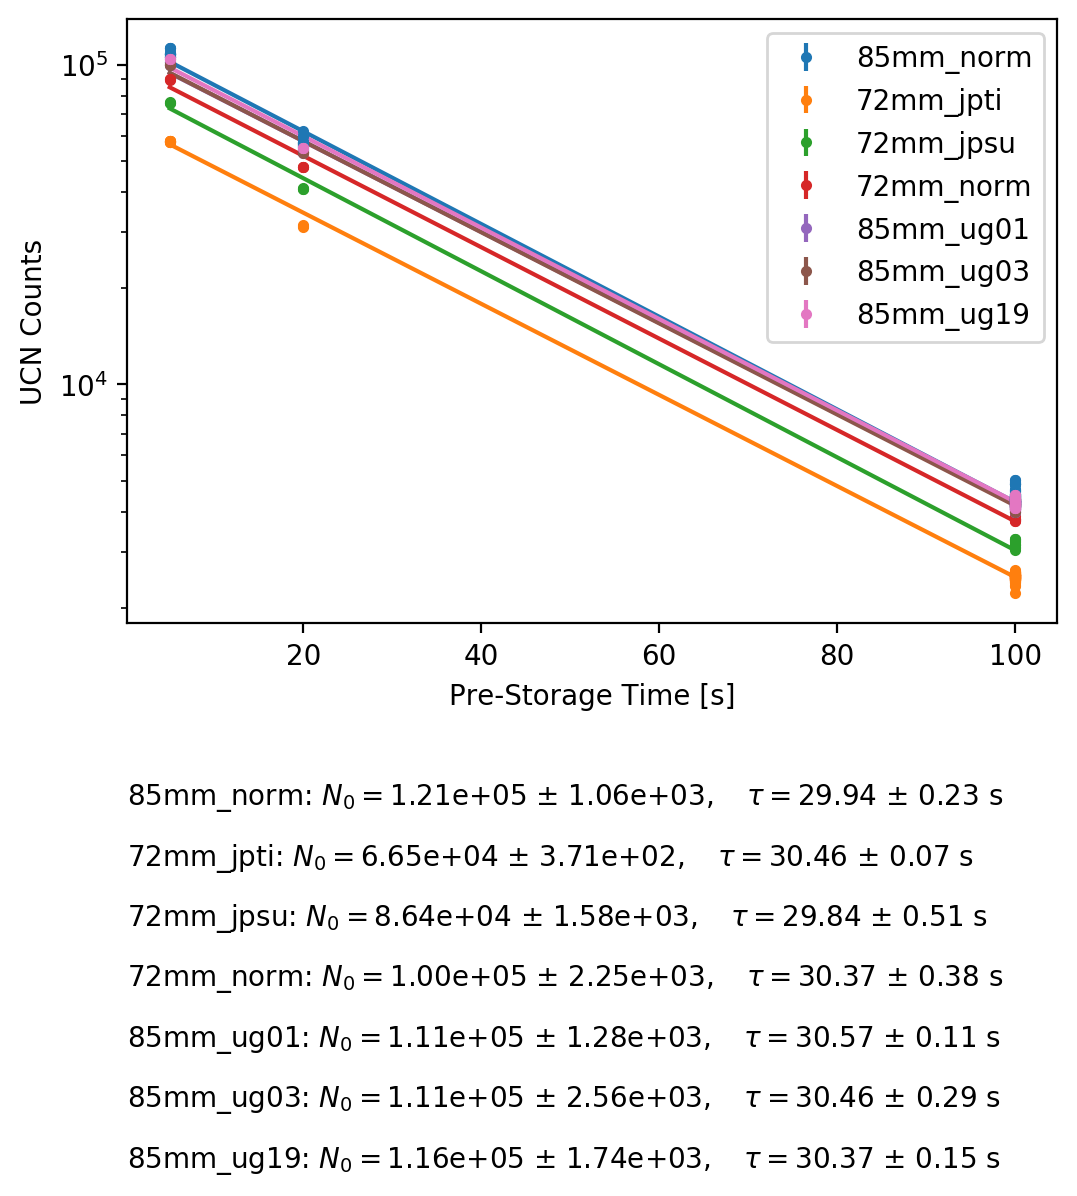

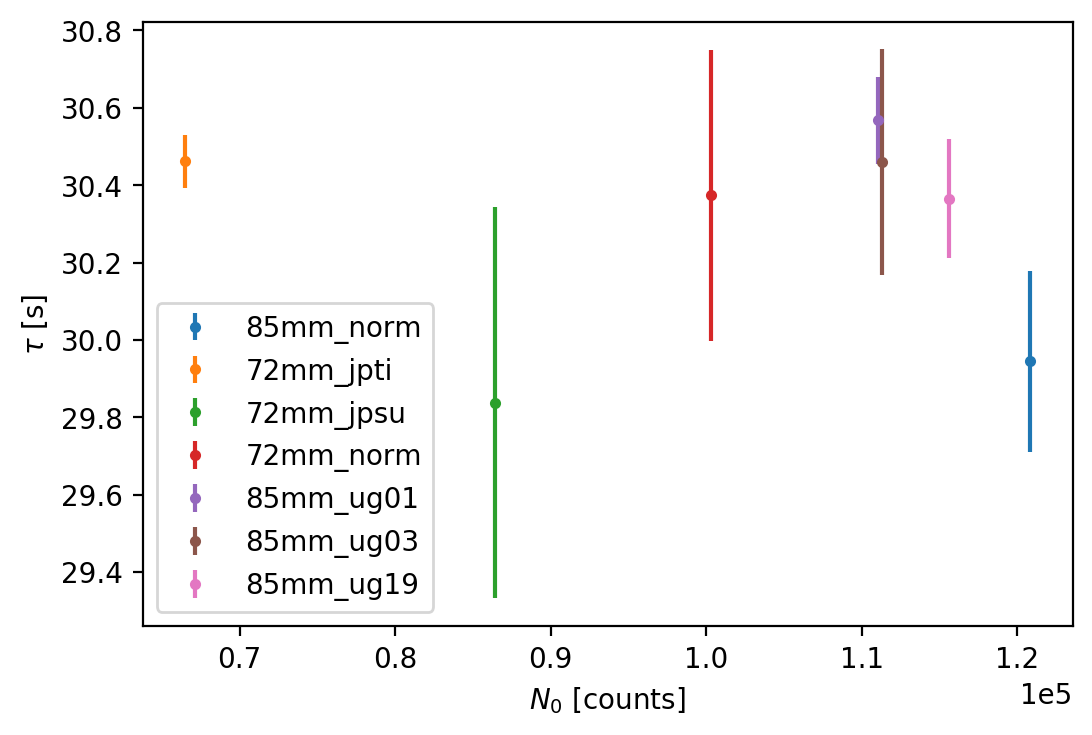

In [5]:
config_list = ['85mm_norm', '72mm_jpti', '72mm_jpsu', '72mm_norm', '85mm_ug01', '85mm_ug03', '85mm_ug19']
run_type_list = ['005s', '020s', '100s']

fig, ax = plt.subplots()
ax = plt.gca()

fig_tau, ax_tau = plt.subplots()

# for counting loop iterations
text_y_coord = -0.2

# iterate over every configuration
for config in config_list:
    
    no_shot_data = np.empty((0,5), float)
    
    # update the plotting color
    color = next(ax._get_lines.prop_cycler)['color']
    
    # iterate over all three pre-storage measurement times
    for run_type in run_type_list:
        
        # grab the array of data for this configuration and pre-storage time
        arr = data_dict[config, run_type]
        
        # (!!!) average it into a single value
        # generate uncertainty array of the count data, calculate mean, add to dict
        uarr = unumpy.umatrix(arr[:,2], arr[:,3])
        N = uarr.mean(1)[0,0]
        print(N)
        
        if (run_type == '005s'):
            
            ax.errorbar(arr[:,1], arr[:,2], yerr = arr[:,3], fmt = '.',
                     label = config, color = color)
        
        else:
            
            ax.errorbar(arr[:,1], arr[:,2], yerr = arr[:,3], fmt = '.',
                     color = color)
            
        no_shot_data = np.append(no_shot_data, 
                    arr,
                    axis=0)
            
    # performing an exponential fit
    t      = no_shot_data[:,1]
    counts = no_shot_data[:,2]
    gmodel = Model(storage_lt_fit)
    params = gmodel.make_params(N_0=10000, tau=30)
    result = gmodel.fit(counts, params, t=t, weights = 1/no_shot_data[:,3])
    
    ax.plot(t, result.best_fit, color = color);
    
    # printing the fit results below the figure
    text_y_coord = text_y_coord - 0.1
    ax.text(0, text_y_coord, config 
            + r': $N_0 = $%.2e $\pm $ %.2e$, \quad \tau = $%.2f $ \pm $ %.2f s' % (
                decimal.Decimal(result.params['N_0'].value), 
                decimal.Decimal(result.params['N_0'].stderr),
                decimal.Decimal(result.params['tau'].value),
                decimal.Decimal(result.params['tau'].stderr)),
            transform=ax.transAxes);
    
    print(config + ': dof = {}, redchi = {}'.format(result.nfree, result.redchi))
    
    ax_tau.errorbar(result.params['N_0'].value, result.params['tau'].value, yerr = result.params['tau'].stderr, fmt = '.', label = config, color = color)
        
ax.set_ylabel('UCN Counts');
ax.set_xlabel('Pre-Storage Time [s]')
ax.legend();
ax.set_yscale('log')
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.savefig('../img/storage_lifetime.pdf')

ax_tau.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax_tau.set_ylabel(r'$\tau$ [s]');
ax_tau.set_xlabel(r'$N_0$ [counts]')
ax_tau.legend();
fig_tau.savefig('../img/all_taus.pdf')

We see a near agreement here between GD01 and GD03, which is to be expected since they are the same guide but with different polishing techniques. The relatively tight spread of the storage lifetime, $\tau$, is as expected, since the guide geometry and material should have little effect on this measurement.